In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

### 1. Load Data

In [44]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target_name'] = None
df['target'] = data.target
df['target_name'] = df['target'].apply(lambda x: data.target_names[x])

shuffle(df, random_state=42).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name,target
73,6.1,2.8,4.7,1.2,versicolor,1
18,5.7,3.8,1.7,0.3,setosa,0
118,7.7,2.6,6.9,2.3,virginica,2
78,6.0,2.9,4.5,1.5,versicolor,1
76,6.8,2.8,4.8,1.4,versicolor,1


### 2. Info & Histogram

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


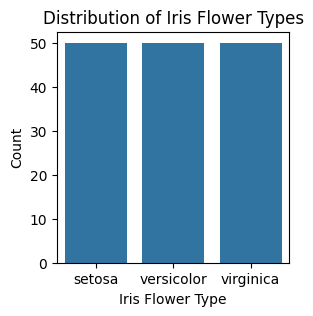

In [48]:
plt.figure(figsize=(3, 3))
sns.countplot(data=df, x='target_name')
plt.title('Distribution of Iris Flower Types')
plt.xlabel('Iris Flower Type')
plt.ylabel('Count')
plt.show()

### 3. Train & Test

In [49]:
X = df.drop(['target', 'target_name'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


### 4. Model (Random Forest)

In [51]:
model = RandomForestClassifier(random_state=42)

### 5. Cross-validation

In [59]:
# Оценка производительности модели с помощью кросс-валидации
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print(f'Cross-validation accuracy scores: {scores.round(4)}')
print(f'Mean accuracy: {scores.mean().round(4)}')

Cross-validation accuracy scores: [0.9583 0.9583 0.8333 1.     0.9583]
Mean accuracy: 0.9417


### 6. GridSearchCV

In [76]:
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 6, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=200),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_split': [2, 5, 6, 10],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='accuracy')

### 7. Best model

In [77]:
best_params = grid_search.best_params_
model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=400)

In [85]:
best_params

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 400}

In [78]:
best_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Выведите результаты
print(f'Cross-validation accuracy scores: {best_scores.round(4)}')
print(f'Mean accuracy: {best_scores.mean().round(4)}')

Cross-validation accuracy scores: [0.9583 1.     0.8333 1.     0.9583]
Mean accuracy: 0.95


Значения точности варьируются от 0.8333 до 1.0. Это может указывать на то, что модель имеет хорошую производительность на большинстве фолдов, но в одном из фолдов точность немного ниже.

 Средняя точность 0.95 говорит о том, что модель в среднем правильно классифицирует 95% образцов на обучающих данных. Это хороший показатель.

In [79]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=400)

In [80]:
# Оценка производительности на тестовой выборке
test_accuracy = best_model.score(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')


Test accuracy: 1.0


In [81]:
# Предсказания и анализ результатов
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

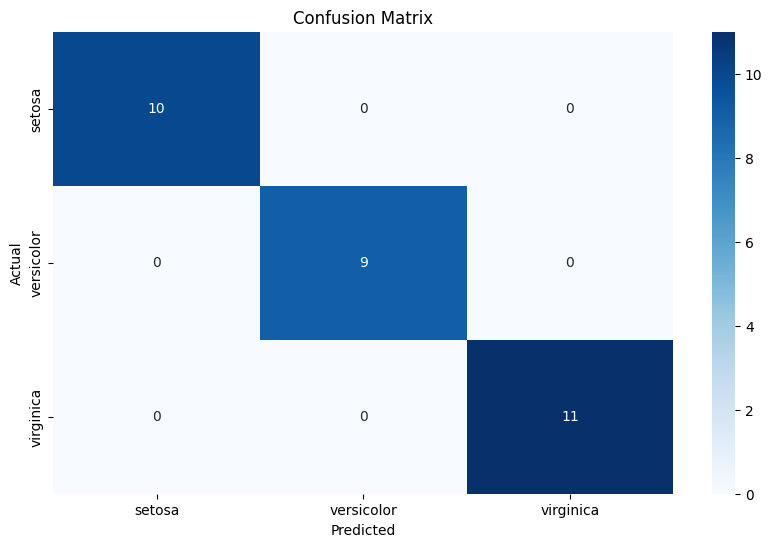

In [82]:
# Отображение матрицы неточностей
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [83]:
# Отчет о классификации
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


<b>Precision (Точность):</b> Это доля правильно предсказанных положительных случаев среди всех случаев, предсказанных как положительные. В данном случае для всех классов (setosa, versicolor, virginica) точность составляет 1.00, что означает, что модель не делает ложных положительных предсказаний.

<b>Recall (Полнота):</b> Это доля правильно предсказанных положительных случаев среди всех настоящих положительных случаев. В данном случае полнота также составляет 1.00 для всех классов, что означает, что модель обнаруживает все положительные случаи.

<b>F1-score:</b> Это среднее гармоническое точности и полноты. Высокий F1-score (1.00) для всех классов говорит о том, что модель хорошо сбалансирована и не имеет проблем с ни одним из классов.

<b>Accuracy (Точность):</b> В данном случае точность составляет 1.00, что означает, что модель правильно классифицировала все 30 образцов в тестовом наборе данных.


Вывод:

Кросс-валидация позволяет оценить стабильность и обобщающую способность модели, тестируя её на разных подмножествах данных. В данном случае наша модель показала стабильную производительность на всех фолдах, что является хорошим признаком.

Подбор гиперпараметров помог оптимизировать параметры модели для достижения наилучших результатов. В нашем случае использовались следующие оптимальные параметры:

* max_depth=10: Глубина деревьев в случайном лесе.
* min_samples_split=2: Минимальное количество образцов, необходимых для разделения узла.
* n_estimators=400: Количество деревьев в лесу.